In [1]:
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow.keras.layers import Layer

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load Data

In [2]:
from src.data_handling import load_dataset

MONET_FILENAMES = tf.io.gfile.glob("../images/artists/monet/monet_tfrec/*.tfrec")
print('Monet TFRecord Files:', len(MONET_FILENAMES))

PHOTO_FILENAMES = tf.io.gfile.glob("../images/random_images/photo_tfrec/*.tfrec")
print('Photo TFRecord Files:', len(PHOTO_FILENAMES))

monet_ds = load_dataset(MONET_FILENAMES, apply_jitter=True)
photo_ds = load_dataset(PHOTO_FILENAMES, apply_jitter=True)

photo_ds_test = load_dataset(PHOTO_FILENAMES, repeat=False, shuffle=False, batch_size=1)

Number of replicas: 1
Monet TFRecord Files: 5
Photo TFRecord Files: 20


2022-09-30 01:34:49.446065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-09-30 01:35:58.919986: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-09-30 01:35:59.518200: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


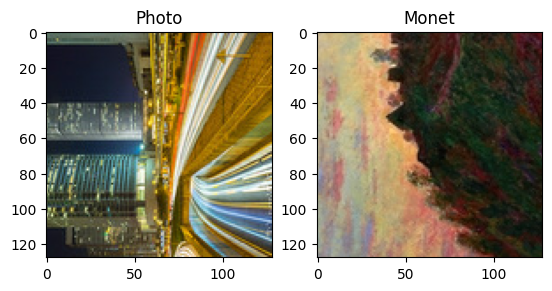

In [8]:
example_monet = next(iter(monet_ds))
example_photo = next(iter(photo_ds))
plt.subplot(121)
plt.title('Photo')
plt.imshow(example_photo[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Monet')
plt.imshow(example_monet[0] * 0.5 + 0.5)